# Linear Regression with Gradient Descent

In [35]:
# y = 2x + 5 + noise

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

In [37]:
# Generate random synthetic data
# Our data will have one feature(x) and one target variable(y)
# y = 2x + 5 + noise
np.random.seed(0) # for reproducibility


X = 2 * np.random.rand(100, 1) # 100 data points, 1 input feature
y = 5 + 2 * X + np.random.randn(100, 1) # linear relation with some noise


print(f"X shape: {X.shape}, y shape: {y.shape}")
print(f"First 5 entries of X:\n{X[:5]}")
print(f"First 5 entries of y:\n{y[:5]}")

X shape: (100, 1), y shape: (100, 1)
First 5 entries of X:
[[1.09762701]
 [1.43037873]
 [1.20552675]
 [1.08976637]
 [0.8473096 ]]
First 5 entries of y:
[[6.03010417]
 [8.76158395]
 [7.87671594]
 [5.64328905]
 [8.18287139]]


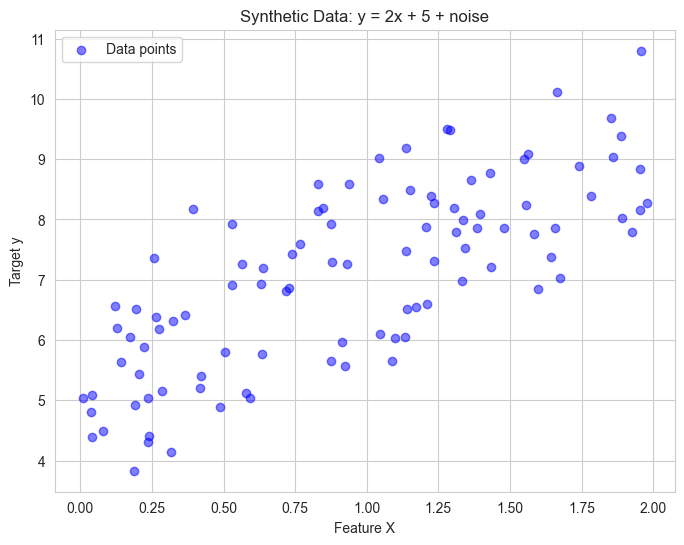

In [38]:
# Plotting the data
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', alpha=0.5, label='Data points')
plt.xlabel('Feature X')
plt.ylabel('Target y')
plt.title('Synthetic Data: y = 2x + 5 + noise')
plt.legend()
plt.show()

In [39]:
# Initialize model parameters (Weights and Bias)
# For y = w*x + b, we need to initialize w and b

w = np.random.randn(1,1) # weight
b = np.random.randn(1, 1) # bias


print(f"Initial weight (w): {w}")
print(f"Initial bias (b): {b}")

Initial weight (w): [[-0.35399391]]
Initial bias (b): [[-1.37495129]]


In [40]:
# Define Hyperparameters
learning_rate = 0.01
n_epochs = 1000 # number of iterations for Gradient Descent

In [41]:
# Store loss and parameters history for visualization
loss_history = []
w_history = []
b_history = []

In [42]:
# Training Loop (Gradient Descent)
for epoch in range(n_epochs):
    # In Linear Algebra, Calculate predictions as Y_pred = w*X + b
    y_pred = X @ w + b  # Using @ for matrix multiplication, '+' uses broadcasting for bias

    # Calculate Mean Squared Error Loss
    errors = y_pred - y
    mse_loss = np.mean(errors ** 2)

    loss_history.append(mse_loss)
    w_history.append(w.flatten()[0])
    b_history.append(b.flatten()[0])

    # Calculus: Calculate Gradients (Partial Derivatives of Loss w.r.t w and b)
    # dw = 2/N * sum((y_pred - y) * X)
    # db = 2/N * sum(y_pred - y)
    dw = (2 / len(X)) * (X.T @ errors) # X.T @ errors is equivalent to sum((y_pred - y) * X)
    db = (2 / len(X)) * np.sum(errors)

    # Optimization: Update parameters using Gradient Descent
    w = w - learning_rate * dw
    b = b - learning_rate * db

    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Loss = {mse_loss}, w = {w.flatten()[0]}, b = {b.flatten()[0]}")

    

print("Training Complete.")
print(f"Final trained weight (w): {w.flatten()[0]}")
print(f"Final trained bias (b): {b.flatten()[0]}")
print(f"Final Loss: {mse_loss}")

Epoch 0: Loss = 80.10597913368353, w = -0.17225617323345002, b = -1.199087427888491
Epoch 100: Loss = 1.9815474290259931, w = 3.530059325071967, b = 3.3323085381412216
Epoch 200: Loss = 1.5026950849733494, w = 3.1454606573584236, b = 3.893795042101204
Epoch 300: Loss = 1.2601903518470678, w = 2.8217451387807784, b = 4.260498862130454
Epoch 400: Loss = 1.13293953726678, w = 2.5865845814069823, b = 4.525547069839307
Epoch 500: Loss = 1.0661655363919857, w = 2.416226480052508, b = 4.717537104261492
Epoch 600: Loss = 1.0311263326355495, w = 2.2928203560968092, b = 4.856612948012389
Epoch 700: Loss = 1.0127397482793077, w = 2.2034259924641693, b = 4.957358321295733
Epoch 800: Loss = 1.0030915129301494, w = 2.1386694649271814, b = 5.030337424994678
Epoch 900: Loss = 0.9980286669143185, w = 2.091760379317394, b = 5.083202875834736
Training Complete.
Final trained weight (w): 2.0580682593077118
Final trained bias (b): 5.12117311317607
Final Loss: 0.9953909493792524


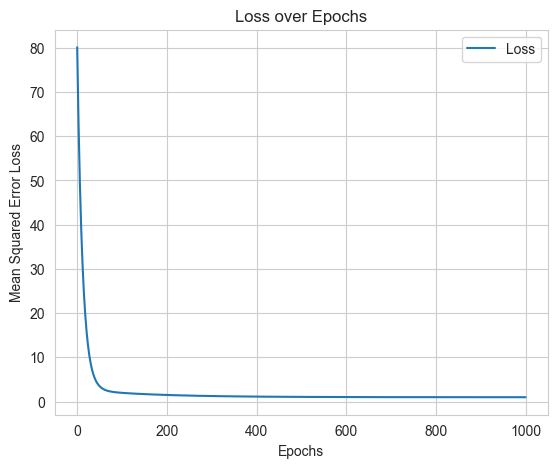

In [43]:
# Visualization of Training Progress
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(loss_history, label='Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error Loss')
plt.legend()
plt.show()

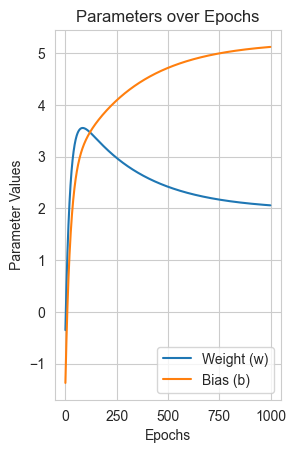

In [44]:
plt.subplot(1, 2, 2)
plt.plot(w_history, label='Weight (w)')
plt.plot(b_history, label='Bias (b)')
plt.title('Parameters over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Parameter Values')
plt.legend()

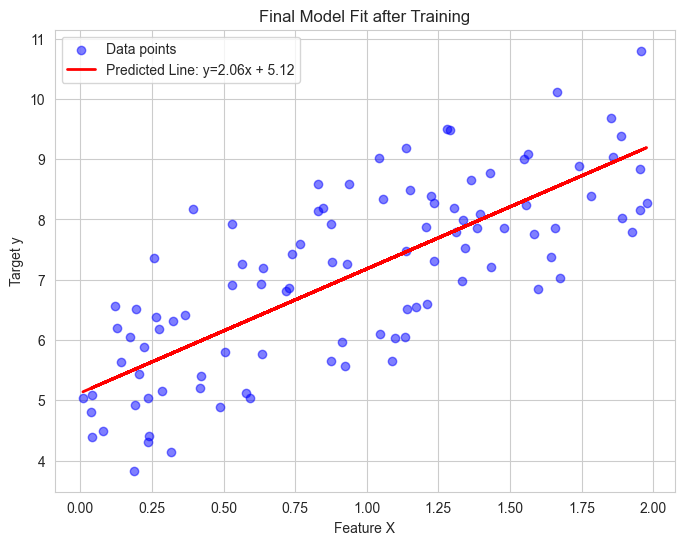

Mean of Residuals: 0.016252600357251134
Variance of Residuals: 0.9951078258112339


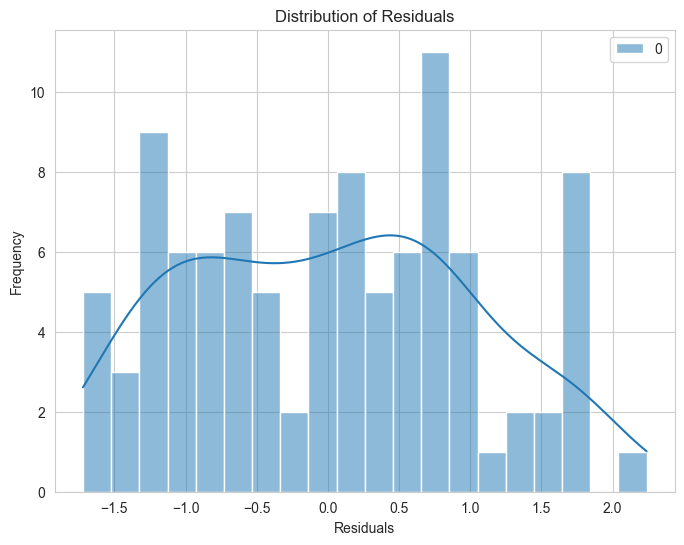

In [45]:
# Evaluate model performance and visualize Final Fit
final_y_pred = X @ w + b

plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', alpha=0.5, label='Data points')
plt.plot(X, final_y_pred, color='red', linewidth=2, label=f"Predicted Line: y={w.flatten()[0]:.2f}x + {b.flatten()[0]:.2f}")
plt.xlabel('Feature X')
plt.ylabel('Target y')
plt.title('Final Model Fit after Training')
plt.legend()
plt.show()


residuals = y - final_y_pred
print(f"Mean of Residuals: {np.mean(residuals)}")
print(f"Variance of Residuals: {np.var(residuals)}")

plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=20, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Linear Regression using the Insurance Dataset

In [46]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


sns.set_style("whitegrid")

In [47]:
df = pd.read_csv('./data/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [48]:
# age = 35, male, bmi = 28, children = 2, smoker = 'yes', region = 'northeast'

# we need to use linear regression to predict the insurance charges for this person.

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [50]:
# We'll encode the categorical variables using label and one-hot encoding.

# sex = 0 for female and 1 for male
# smoker = 0 for no and 1 for yes
# region = one-hot encoding


df['sex'] = df['sex'].map({'female': 0, 'male': 1})
df['smoker'] = df['smoker'].map({'no': 0, 'yes': 1})


# One-Hot Encoding for region
df = pd.get_dummies(df, columns=['region'], drop_first=True)

df.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,False,False,True
1,18,1,33.770,1,0,1725.55230,False,True,False
2,28,1,33.000,3,0,4449.46200,False,True,False
3,33,1,22.705,0,0,21984.47061,True,False,False
4,32,1,28.880,0,0,3866.85520,True,False,False


In [51]:
# Splitting the data into features and target variable
X = df.drop('charges', axis=1).values.astype(float)
y = df['charges'].values


X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# print(X_train_raw.shape, X_test_raw.shape, y_train.shape, y_test.shape)

# Feature Scaling using StandardScaler
# scaler = StandardScaler()
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train_raw)
X_test = scaler.transform(X_test_raw)

# fit_transform computes the mean and std deviation on the training data and then transforms it.
# transform uses the mean and std deviation computed from the training data to scale the test data.

# print(X_train.shape, X_test.shape)
# print(X_train[:5])
# print(X_test[:5])

In [52]:
# Training the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [53]:
model.coef_, model.intercept_

(array([ 6.16741694e+03, -1.85916916e+01,  2.79491862e+03,  8.50557567e+02,
         2.36511289e+04, -3.70677326e+02, -6.57864297e+02, -8.09799354e+02]),
 np.float64(8809.574416261392))

In [54]:
y_pred = model.predict(X_test)
# print(y_pred)

In [55]:
# comparing the actual and predicted values
# comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
# print(comparison_df.head(10))

In [56]:
# Now, for evaluating the model performance, we can calculate metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared.
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mse)}")
print(f"R-squared: {r2}")

Mean Absolute Error (MAE): 4181.194473753653
Mean Squared Error (MSE): 33596915.85136148
Root Mean Squared Error (RMSE): 5796.284659276275
R-squared: 0.7835929767120722


In [57]:
# Taking input from the user and predicting insurance charges
# age = 35, male, bmi = 28, children = 2, smoker = 'yes', region = 'northeast'

input_data = np.array([[35, 1, 28, 2, 1, 0, 0, 1]]) # region_northwest=0, region_southeast=0, region_southwest=1

input_data_scaled = scaler.transform(input_data)
prediction = model.predict(input_data_scaled)

print(f"The predicted insurance charges for the given input data is: ${prediction[0]:.2f}")

The predicted insurance charges for the given input data is: $30174.82


In [58]:
# if we have to take input from the user via console

# age = int(input("Enter age: "))
# sex = int(input("Enter sex (0 for female, 1 for male): "))
# bmi = float(input("Enter BMI: "))
# children = int(input("Enter number of children: "))
# smoker = int(input("Enter smoker status (0 for no, 1 for yes): "))
# region_northwest = int(input("Enter region_northwest (0 or 1): "))
# region_southeast = int(input("Enter region_southeast (0 or 1): "))
# region_southwest = int(input("Enter region_southwest (0 or 1): "))
# input_data = np.array([[age, sex, bmi, children, smoker, region_northwest, region_southeast, region_southwest]])
# input_data_scaled = scaler.transform(input_data)
# prediction = model.predict(input_data_scaled)
# print(f"The predicted insurance charges for the given input data is: ${prediction[0]:.2f}")

In [59]:
# After this, we export the model as a pickle file for future use.
# Then, we can load the model and use it to make predictions without retraining.
# Using the model, we can predict insurance charges for new data points on a web application or any other interface.

In [60]:
import pickle

# Save the model to a pickle file
with open('./models/insurance_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [62]:
# import pickle

# load the model from the pickle file
with open('./models/insurance_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Now, we can use loaded_model to make predictions

input_data = np.array([[35, 1, 28, 2, 1, 0, 0, 1]]) # region_northwest=0, region_southeast=0, region_southwest=1

input_data_scaled = scaler.transform(input_data)
loaded_model.predict(input_data_scaled)
print(f"The predicted insurance charges using loaded model for the given input data is: ${loaded_model.predict(input_data_scaled)[0]:.2f}")

The predicted insurance charges using loaded model for the given input data is: $30174.82


In [63]:
# Streamlit is generally used for building web applications for machine learning models.